In [1]:
%run Latex_macros.ipynb
%run beautify_plots.py

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mnist_helper
%aimport mnist_helper

mnh = mnist_helper.MNIST_Helper(random_seed=42)

import class_helper
%aimport class_helper

clh= class_helper.Classification_Helper()


In [4]:
from sklearn.model_selection import cross_val_score

# Beyond accuracy for full MNIST

We now have tools to *measure* weaknesses in our predictions.

But to become a successful Data Scientist, you will need to take some *action* to correct the mis-predictions.

We roll up our sleeves and diagnose errors
- Perform a deep dive into the misclassified examples
- Determine if there is a systematic problem
- Propose model improvements
    - Feature Engineering: adding features to help the model identify classes more easily
    - Modify the Loss function
    
We will focus on diagnosis for now and leave potential improvements for you to experiment with.


Let's start by fitting the model and plotting the Confusion Matrix.

Retrieving MNIST_784 from cache
Normalized confusion matrix


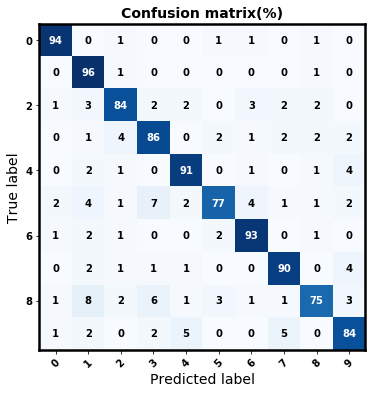

In [5]:
mnh = mnist_helper.MNIST_Helper(random_seed=42)
mnh.setup()
_= mnh.fit()

# Now predict the value of the digit on the second half:
fig, ax = plt.subplots(figsize=(12,6))
confusion_mat = mnh.create_confusion_matrix()

digits = range(0,10)
_= clh.plot_confusion_matrix(confusion_mat, digits, ax=ax, normalize=True)

As we have already observed
- We perform extremely well on images of the digits 0, 1, 6
- The biggest problem lies with images of the digits 5, 8
- But we do less well with other digits: 2, 3, 4, 9
    
Questions to ask yourself:
- Are the type and level of mis-prediction acceptable ?
- If not: can you come up with new features that reduce mis-prediction ?

What we have done above is to examine *Conditional Accuracy* (Recall) via the Confusion Matrix:
- Accuracy conditioned on examples with a particular target

Let's "zoom in" and examine mis-classified examples for a single digit $D \in \{ 0, 1, \ldots, 9 \}$
- If we see some commonality on these examples, we might propose a synthetic feature to compensate

We can achieve this with a little coding
- Remember: Jupyter allows use to inspect the code by typing `mnh.plot_problem_digits??` into a code cell

In [13]:
# Inspect the code by removing the leading "#" on the next line
# mnh.plot_problem_digits??

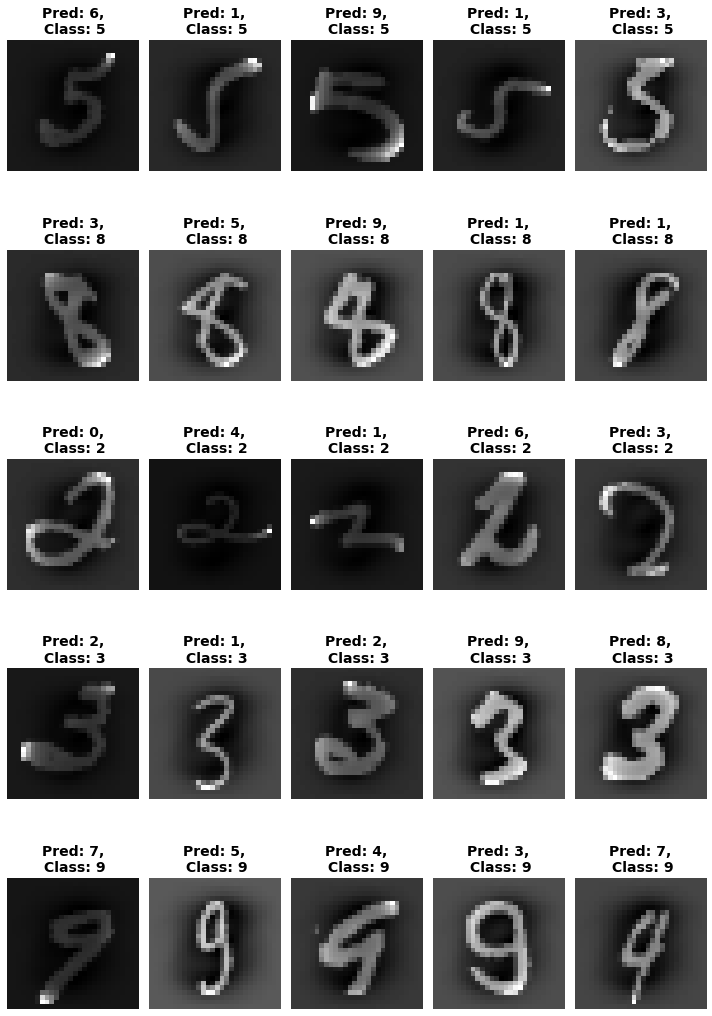

In [7]:
problem_digits = [ '5', '8', '2', '3', '9' ]

mnh.plot_problem_digits( problem_digits )

The first row shows the misclassified 5's. 

Why were they mis-classified ?  Theory to test
- Are they of different proportion than correctly classified 5's ? (larger "tops" than "bottoms")

What about the misclassified 8's ?  Theory to test
- Are the rightward "tilt" more extreme than correctly classified 8's ?

There is another possibility:
- With each example $i$ there is a vector $\hat{p}^\ip$ (of length 10) of probabilities of the image being each digit
- We choose as the single prediction the digit with highest probability
$$\hat{\y}^\ip = \argmax{c} \hat{p}^\ip_c$$

- Is it possible that the probability of the incorrect class was barely above that of the correct class ?

Let's answer this question with some code.
- Remember: Jupyter allows use to inspect the code by typing `mnh.predict_with_probs??` into a code cell

In [8]:
# Inspect the code by removing the leading "#" on the next line
# mnh.predict_with_probs??

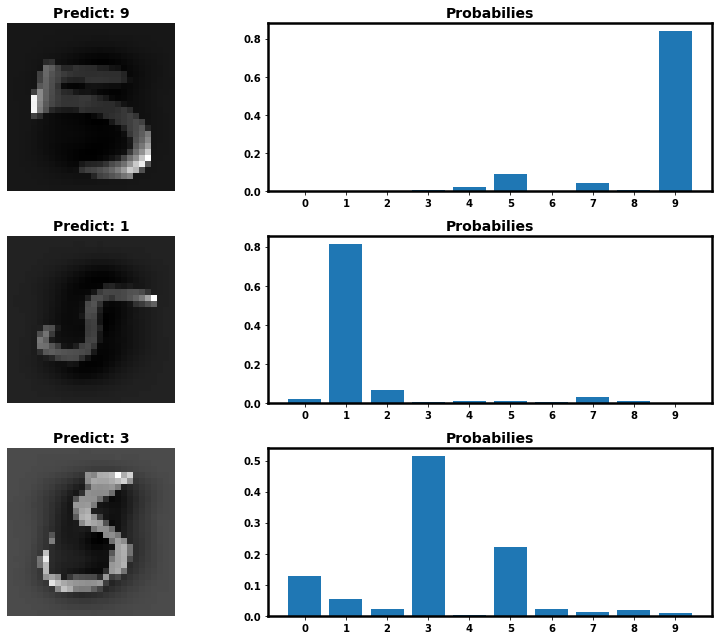

In [9]:
# Select some mis-classified "5"'s'
problems = mnh.misclassified["5"][ [2,3,4] ]
mnh.predict_with_probs(problems, digits)

Examining the probabilities, we refute the possibility
- The probability of the correct class (5) is *much* lower than several incorrect classes


Let's narrow our focus 
to a single digit (8) with a misclassification to a particular digit (1)


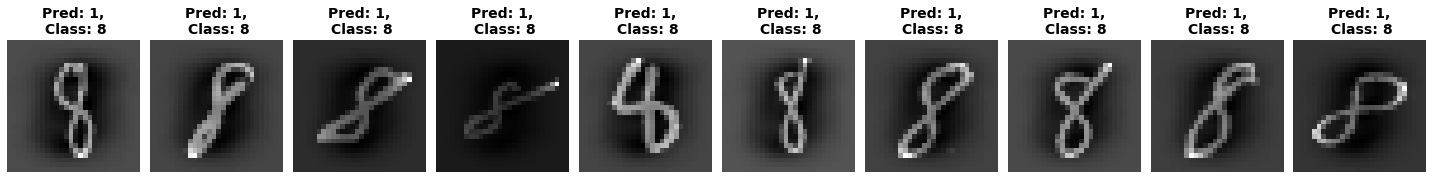

In [10]:
mnh.plot_problem_digits( ['8'], wrong_class='1', num_cols=10)

Theories:
- Are a couple of extremely bright pixels a possible cause for misclassification ?
- Is the "broken" or "mis-shaped" top a possible cause for misclassification ?

We leave it to you to explore these and alternative theories, along with possible fixes.

In [11]:
print("Done")

Done
